In [1]:
%load_ext autoreload
%autoreload 2
import sys

sys.path.append("../")
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt
from src.dataloaders import PointOnlyDataloader, NoiseDataLoader, IDataloader
from src.solutions import EllipseDataFitting

dataset_dir = Path('../dataset')
root_file = "farichsim_pi-pi-_45-360deg_1200.0k_ideal_2020-12-24_rndm.root"
root_path = dataset_dir / root_file

In [3]:
df = pd.read_csv(dataset_dir / 'dataset_100_with_noise_2e5.csv')

In [32]:
df1 = df[(df.signal == True) & (df.entry==0) & (df.t_c <= 5)]

In [33]:
df1['x_c'] = df1['x_c'] / 50
df1['y_c'] = df1['y_c'] / 50

/var/folders/2h/pvzr32ss6hd_92k0r59f4k940000gn/T/ipykernel_24513/1072711774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['x_c'] = df1['x_c'] / 50
/var/folders/2h/pvzr32ss6hd_92k0r59f4k940000gn/T/ipykernel_24513/1072711774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['y_c'] = df1['y_c'] / 50


In [34]:
df1['point'] = df1.apply(lambda x: np.array([x.x_c, x.y_c, x.t_c]), axis=1)

/var/folders/2h/pvzr32ss6hd_92k0r59f4k940000gn/T/ipykernel_24513/573526562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['point'] = df1.apply(lambda x: np.array([x.x_c, x.y_c, x.t_c]), axis=1)


In [35]:
df1

,entry,subentry,x_c,y_c,z_c,t_c,signal,point
0,0,0,2.00,1.10,201.05,2.164233,1,"[2.0, 1.1, 2.1642333532752525]"
1,0,1,2.10,0.62,201.05,2.372049,1,"[2.1, 0.62, 2.3720485235633384]"
2,0,2,2.20,0.64,201.05,2.357888,1,"[2.2, 0.64, 2.357888486522628]"
3,0,3,2.12,1.34,201.05,2.049059,1,"[2.12, 1.34, 2.0490589405478965]"
4,0,4,2.34,0.74,201.05,2.302570,1,"[2.34, 0.74, 2.302569534915877]"
5,0,5,2.34,0.66,201.05,2.340455,1,"[2.34, 0.66, 2.3404554392280112]"
6,0,6,2.38,1.02,201.05,2.178033,1,"[2.38, 1.02, 2.1780326630057822]"
7,0,7,2.40,1.42,201.05,2.000937,1,"[2.4, 1.42, 2.0009372497977744]"
8,0,8,2.28,1.48,201.05,1.986993,1,"[2.28, 1.48, 1.9869928027572168]"
9,0,9,2.42,0.74,201.05,2.300983,1,"[2.42, 0.74, 2.300982620853377]"


In [36]:
df2= df1.merge(df1, on='entry', how='outer')

In [37]:
df2['distance'] = df2.apply(lambda x: np.linalg.norm(x.point_x-x.point_y), axis=1)

In [38]:
df2

,entry,subentry_x,x_c_x,y_c_x,z_c_x,t_c_x,signal_x,point_x,subentry_y,x_c_y,y_c_y,z_c_y,t_c_y,signal_y,point_y,distance
0,0,0,2.00,1.10,201.05,2.164233,1,"[2.0, 1.1, 2.1642333532752525]",0,2.00,1.10,201.05,2.164233,1,"[2.0, 1.1, 2.1642333532752525]",0.000000
1,0,0,2.00,1.10,201.05,2.164233,1,"[2.0, 1.1, 2.1642333532752525]",1,2.10,0.62,201.05,2.372049,1,"[2.1, 0.62, 2.3720485235633384]",0.532529
2,0,0,2.00,1.10,201.05,2.164233,1,"[2.0, 1.1, 2.1642333532752525]",2,2.20,0.64,201.05,2.357888,1,"[2.2, 0.64, 2.357888486522628]",0.537682
3,0,0,2.00,1.10,201.05,2.164233,1,"[2.0, 1.1, 2.1642333532752525]",3,2.12,1.34,201.05,2.049059,1,"[2.12, 1.34, 2.0490589405478965]",0.292002
4,0,0,2.00,1.10,201.05,2.164233,1,"[2.0, 1.1, 2.1642333532752525]",4,2.34,0.74,201.05,2.302570,1,"[2.34, 0.74, 2.302569534915877]",0.514137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,0,17,3.62,1.66,201.05,2.246440,1,"[3.62, 1.66, 2.246439840930892]",13,2.46,1.44,201.05,1.995131,1,"[2.46, 1.44, 1.995131340164138]",1.207127
320,0,17,3.62,1.66,201.05,2.246440,1,"[3.62, 1.66, 2.246439840930892]",14,2.66,1.94,201.05,1.981144,1,"[2.66, 1.94, 1.9811443354072105]",1.034593
321,0,17,3.62,1.66,201.05,2.246440,1,"[3.62, 1.66, 2.246439840930892]",15,3.02,3.34,201.05,2.500193,1,"[3.02, 3.34, 2.5001926685752403]",1.801885
322,0,17,3.62,1.66,201.05,2.246440,1,"[3.62, 1.66, 2.246439840930892]",16,2.90,4.62,201.05,3.104372,1,"[2.9, 4.62, 3.104372170108749]",3.164814


In [39]:
df2.to_csv('res.csv')

In [9]:
df[(df.signal == True) & (df.entry==0)]

,entry,subentry,x_c,y_c,z_c,t_c,signal
0,0,0,100,55,201.05,2.164233,1
1,0,1,105,31,201.05,2.372049,1
2,0,2,110,32,201.05,2.357888,1
3,0,3,106,67,201.05,2.049059,1
4,0,4,117,37,201.05,2.302570,1
5,0,5,117,33,201.05,2.340455,1
6,0,6,119,51,201.05,2.178033,1
7,0,7,120,71,201.05,2.000937,1
8,0,8,114,74,201.05,1.986993,1
9,0,9,121,37,201.05,2.300983,1


In [4]:
df.memory_usage()

Index          128
entry       665120
subentry    665120
x_c         665120
y_c         665120
z_c         665120
t_c         665120
signal      665120
dtype: int64

In [8]:
dl = PointOnlyDataloader(root_path, verbose=False)
alg = EllipseDataFitting(save_graphics=True)



In [16]:
dl = NoiseDataLoader(root_path, verbose=False, noise_freq_per_sqmm=2e5)
max_delta = 0
for df in tqdm(dl.genChunkFromRoot(event_chunk_size=20000), total=dl.get_total_cnt() / 20000):
    df.to_csv('dataset_with_noise_2e5.csv', mode='a', header=None)
    break
    # max_delta = max(df['t_c'].max() - df['t_c'].min(), max_delta)

  0%|          | 0/60.0 [00:00<?, ?it/s]


TypeError: super(type, obj): obj must be an instance or subtype of type

In [22]:
 max_delta

2.3193755

In [3]:
centers, vectors, normals, point1, point2, point3 = alg.run(df)


  4%|▍         | 2/47 [00:38<14:24, 19.22s/it]


In [4]:
centers = pd.DataFrame(np.array(centers), columns=['x_center', 'y_center', 't_center'])

In [5]:
centers

,x_center,y_center,t_center
0,-50.042775,-14.714778,0.721234


In [8]:
normals = pd.DataFrame(np.array(normals), columns=['x_normal', 'y_normal', 't_normal'])

In [9]:
points1 = pd.DataFrame(np.array(point1), columns=['x_p1', 'y_p1', 't_p1'])

In [10]:
points1

,x_p1,y_p1,t_p1
0,-105.279999,-29.76,0.766782


In [11]:
df

x_c         y_c         z_c       t_c
entry subentry                                              
5     0        -351.040009  399.679993  201.050003  2.387565
      1         -85.120003  -80.959999  201.050003  0.870651
      2        -105.279999  -29.760000  201.050003  0.766782
      3        -105.279999  -25.600000  201.050003  0.767961
      4        -108.639999   -8.800000  201.050003  0.767712
      5         -98.559998   15.520000  201.050003  0.754884
      6        -101.919998    5.440000  201.050003  0.756660
      7        -105.279999    5.440000  201.050003  0.761616
      8         -98.559998   18.879999  201.050003  0.753252
      9         -88.480003   29.760000  201.050003  0.745859
      10        -70.879997 -178.240005  201.050003  1.189885
      11        -64.160004  -67.519997  201.050003  0.743735
      12        -74.239998  -64.160004  201.050003  0.750375
      13        -80.959999  -64.160004  201.050003  0.759340
      14        -67.519997  -57.439999  201.050003  0.740059
      15        -57.439999   22.240000  201.050003  1.134990
      16        -74.239998   33.119999  201.050003  0.730597
      17        -77.599998   36.480000  201.050003  0.732978
      18        -74.239998   36.480000  201.050003  0.730177
      19        -70.879997   36.480000  201.050003  0.725091
      20        -74.239998  219.360001  201.050003  1.580266
      21        -43.200001  -67.519997  201.050003  0.729207
      22        -53.279999  -70.879997  201.050003  0.736687
      23        -33.119999  -67.519997  201.050003  0.721118
      24        -53.279999  -70.879997  201.050003  0.738963
      25        -43.200001   43.200001  201.050003  0.706602
      26        -49.919998   43.200001  201.050003  0.709753
      27        -49.919998   39.840000  201.050003  0.708978
      28        -12.160000 -205.919998  201.050003  1.162304
      29        -22.240000  -60.799999  201.050003  0.709096
      30         -2.080000  -46.560001  201.050003  0.693336
      31         -5.440000  -49.919998  201.050003  0.695881
      32         -5.440000   22.240000  201.050003  0.679680
      33         -5.440000   18.879999  201.050003  0.679365
      34        -22.240000   33.119999  201.050003  0.689608
      35          8.800000  -22.240000  201.050003  0.680270
      36          8.800000    2.080000  201.050003  0.677087
      37          2.080000    8.800000  201.050003  0.677228
      38          5.440000    8.800000  201.050003  0.677986
      39          2.080000    8.800000  201.050003  0.676161
      40         15.520000   88.480003  201.050003  0.832270
      41         46.560001 -108.639999  201.050003  0.802872
      42         43.200001  -64.160004  201.050003  0.735939
      43         36.480000  -57.439999  201.050003  0.738325
      44         29.760000   80.959999  201.050003  0.886469
      45        122.879997  -60.799999  201.050003  0.866539
      46        164.000000 -223.520004  201.050003  1.455103
      47        153.919998  -22.240000  201.050003  0.902340
      48        188.320007  -74.239998  201.050003  0.973741

In [6]:
vec_1 = pd.DataFrame(np.array([i[0] for i in vectors]), columns=['x_v_1', 'y_v_1', 't_v_1'])

In [7]:
vec_1

,x_v_1,y_v_1,t_v_1
0,-105.870569,-27.304654,0.766708


In [14]:
point1

[Point([-105.28     ,  -29.76     ,    0.7667816], dtype=float32)]

In [1]:
ax = dl.plot_solution(df)

for norm, point11, point22, point33 in zip(normals, point1, point2, point3):
    # print(norm, point)
    # norm = norm / np.linalg.norm(norm)
    ax.plot([vec_1['t_v_1'][0], centers['t_center'][0]],
            [vec_1['x_v_1'][0], centers['x_center'][0]],
            [vec_1['x_v_1'][0], centers['y_center'][0]],
            label='Vec_1')
    ax.scatter3D(centers['t_center'][0], centers['x_center'][0], centers['y_center'][0], 'g.', label='Centers')
    ax.scatter3D(point11[2], point11[0], point11[1], 'y.', label='Point1')
    break

plt.legend()
plt.show()
# plt.savefig("tmp/exampl.png")

NameError: name 'dl' is not defined

In [8]:
x = np.array([0.00000, 45.77594, -0.00000, -5.24599, 5.89959])
y = np.array([0.00000, 0.00000, 55.82716, 43.18748, 69.42272])

In [9]:
from src.utils.geometry import get_ellipse_from_points

centr, params, vectors = get_ellipse_from_points(x, y)

LinAlgError: Singular matrix

In [10]:
D = np.column_stack((x ** 2, x * y, y ** 2, x, y))

In [11]:
D

array([[   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ],
       [2095.43668288,    0.        ,    0.        ,   45.77594   ,
           0.        ],
       [   0.        ,   -0.        , 3116.67179367,   -0.        ,
          55.82716   ],
       [  27.52041108, -226.56108821, 1865.15842875,   -5.24599   ,
          43.18748   ],
       [  34.80516217,  409.56558468, 4819.5140522 ,    5.89959   ,
          69.42272   ]])

In [6]:
import plotly.graph_objects as go
from src.solutions import EllipseDataFitting
from collections import defaultdict

In [7]:
import time

total_acc = {}
dl = NoiseDataLoader(root_path, verbose=False, noise_freq_per_sqmm=2e4)
alg = EllipseDataFitting(save_graphics=True, eps_proj=1e-2, eps_ellipse=1e-4, minimal_points_in_plain=5)
for idx, df in enumerate(dl):
    if idx == 5:
        start = time.time()
        elipses = alg.run(df)
        top = max(elipses, key=lambda x: len(x.points))
        res = defaultdict(bool)
        for p in top.points:
            res[(p.x, p.y, p.t)] = True
        df['preds'] = df.apply(lambda x: res[(x.x_c, x.y_c, x.t_c)], axis=1)
        total_acc[idx] = (df[df.preds]['x_c'].count() / df[df.signal]['x_c'].count(), time.time() - start)
        assert len(elipses)
        break


100%|██████████| 116/116 [10:09<00:00,  5.25s/it]


35


In [14]:
df[['x_c', 'y_c', 't_c']]

x_c  y_c       t_c
entry subentry                    
5     0          19  236  4.639383
      1          96   97  3.122469
      2          90  112  3.018600
      3          90  113  3.019780
      4          89  118  3.019531
...             ...  ...       ...
      113       159  156  1.147197
      114       215  151  1.368650
      115       105  185  4.237696
      116        19  240  5.164397
      117        81   63  0.924208

[118 rows x 3 columns]

In [15]:
centers = np.array([el.center.to_numpy() for el in elipses])

In [16]:
len(top.points)

35

In [17]:
center = top.center.to_numpy()

In [18]:
from collections import defaultdict

res = defaultdict(bool)

for p in top.points:
    res[(p.x, p.y, p.t)] = True

In [19]:
res

defaultdict(bool,
            {(97.0, 102.0, 3.0111582112530177): True,
             (102.0, 101.0, 2.995553596041531): True,
             (121.0, 123.0, 2.9290470910290187): True,
             (90.0, 112.0, 3.0186002683857387): True,
             (111.0, 101.0, 2.9729366731861537): True,
             (114.0, 130.0, 2.9414269757488674): True,
             (95.0, 129.0, 2.9976776671627468): True,
             (123.0, 121.0, 2.928905589602322): True,
             (120.0, 107.0, 2.945155007860989): True,
             (92.0, 125.0, 3.0067029428699916): True,
             (100.0, 131.0, 2.976909739992947): True,
             (90.0, 122.0, 3.0134345722416347): True,
             (108.0, 133.0, 2.9584206176022): True,
             (105.0, 100.0, 2.988505287192196): True,
             (99.0, 131.0, 2.9819956255176967): True,
             (122.0, 123.0, 2.9298044872501796): True,
             (91.0, 122.0, 3.0084791016796535): True,
             (92.0, 126.0, 3.0050706100681728): True,
        

In [20]:
df['preds'] = df.apply(lambda x: res[(x.x_c, x.y_c, x.t_c)], axis=1)

In [21]:
df

x_c  y_c         z_c       t_c  signal  nhits       x_p  \
entry subentry                                                            
5     0          19  236  201.050003  4.639383    True    118 -0.629396   
      1          96   97  201.050003  3.122469    True    118 -0.629396   
      2          90  112  201.050003  3.018600    True    118 -0.629396   
      3          90  113  201.050003  3.019780    True    118 -0.629396   
      4          89  118  201.050003  3.019531    True    118 -0.629396   
...             ...  ...         ...       ...     ...    ...       ...   
      113       159  156  201.050003  1.147197   False    118 -0.629396   
      114       215  151  201.050003  1.368650   False    118 -0.629396   
      115       105  185  201.050003  4.237696   False    118 -0.629396   
      116        19  240  201.050003  5.164397   False    118 -0.629396   
      117        81   63  201.050003  0.924208   False    118 -0.629396   

                     y_p  z_p      nx_p      ny_p      nz_p      beta  \
entry subentry                                                          
5     0        -0.204372  0.0 -0.209877 -0.060654  0.975845  0.994887   
      1        -0.204372  0.0 -0.209877 -0.060654  0.975845  0.994887   
      2        -0.204372  0.0 -0.209877 -0.060654  0.975845  0.994887   
      3        -0.204372  0.0 -0.209877 -0.060654  0.975845  0.994887   
      4        -0.204372  0.0 -0.209877 -0.060654  0.975845  0.994887   
...                  ...  ...       ...       ...       ...       ...   
      113      -0.204372  0.0 -0.209877 -0.060654  0.975845  0.994887   
      114      -0.204372  0.0 -0.209877 -0.060654  0.975845  0.994887   
      115      -0.204372  0.0 -0.209877 -0.060654  0.975845  0.994887   
      116      -0.204372  0.0 -0.209877 -0.060654  0.975845  0.994887   
      117      -0.204372  0.0 -0.209877 -0.060654  0.975845  0.994887   

                 theta_p     phi_p     momentum  preds  
entry subentry                                          
5     0         0.220242  3.422925  1374.893921  False  
      1         0.220242  3.422925  1374.893921  False  
      2         0.220242  3.422925  1374.893921   True  
      3         0.220242  3.422925  1374.893921   True  
      4         0.220242  3.422925  1374.893921   True  
...                  ...       ...          ...    ...  
      113       0.220242  3.422925  1374.893921  False  
      114       0.220242  3.422925  1374.893921  False  
      115       0.220242  3.422925  1374.893921  False  
      116       0.220242  3.422925  1374.893921  False  
      117       0.220242  3.422925  1374.893921  False  

[118 rows x 17 columns]

In [22]:
df[df.preds & df.signal]['x_c'].count() / df[df.signal]['x_c'].count()

0.6938775510204082

In [23]:
points = np.array([p.to_numpy() for p in top.points])
fig = go.Figure(
    data=[
        go.Scatter3d(z=df[df.signal]['t_c'], x=df[df.signal]['x_c'], y=df[df.signal]['y_c'],
                     mode='markers', name='DF'),
        go.Scatter3d(z=df[~df.signal]['t_c'], x=df[~df.signal]['x_c'], y=df[~df.signal]['y_c'],
                     mode='markers', name='NOISE'),
        # go.Scatter3d(z=[center[2]], x=[center[0]], y=[center[1]],
        #              mode='markers', name='Center'),
        go.Scatter3d(z=points[:, 2], x=points[:, 0], y=points[:, 1],
                     mode='markers', name='Predict'),

    ]
)
fig.update_layout(
    scene={
        "xaxis_title": "X",
        "yaxis_title": "Y",
        "zaxis_title": "T",
    },
)
fig.show()

In [24]:
fig.write_html("results.html")

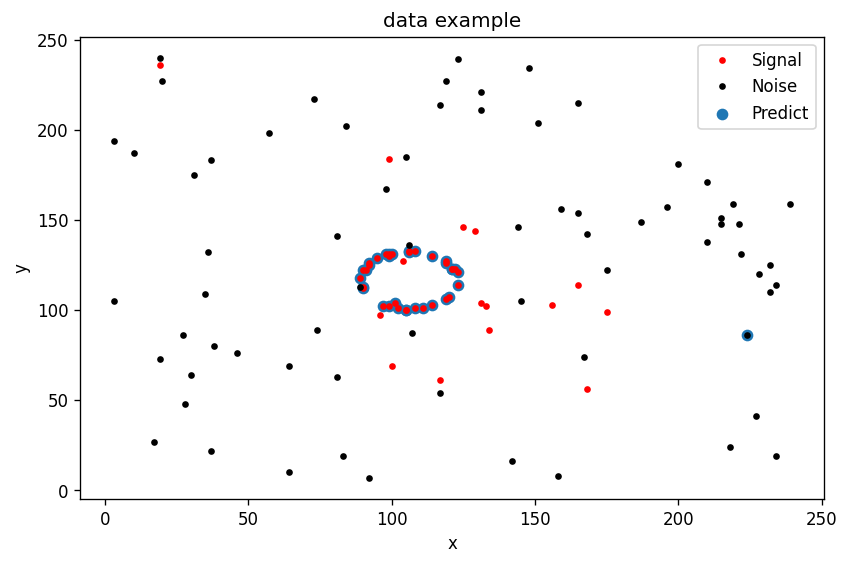

In [29]:
ax = IDataloader.plot_xy_solution(df)
ax.scatter(points[:, 0], points[:, 1], label='Predict')
plt.legend()